Dataset do Kaggle:Gender Classification Dataset

# Importações

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, model_selection, linear_model, metrics
import matplotlib.pyplot as plt

In [3]:
data_raw = pd.read_csv('gender_classification_v7.csv')
data_raw.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


# Verificando dados inconsistentes

In [ ]:
data_raw.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [ ]:
data_raw.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

Como não temos nenhuma coluna categórica nas variáveis independentes e não encontramos nenhum valor inconsistente
vamos transferir ao DataFrame definitivo

In [4]:
df = data_raw

# Exploração dos dados

In [5]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


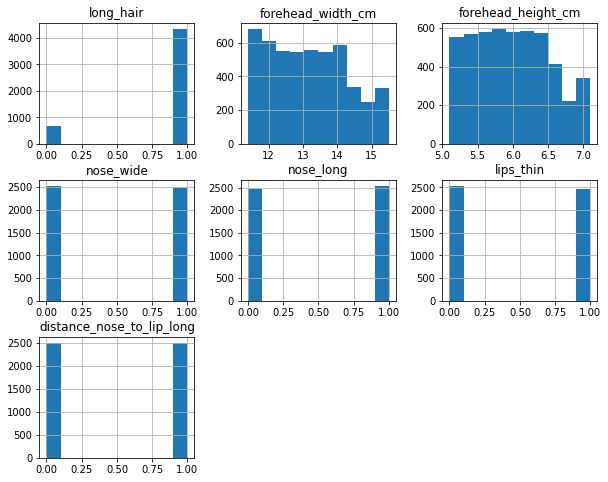

In [6]:
df.hist(figsize=(10,8));

In [7]:
gender_hair = df.groupby(['long_hair'])['gender'].count()
gender_hair

long_hair
0     652
1    4349
Name: gender, dtype: int64

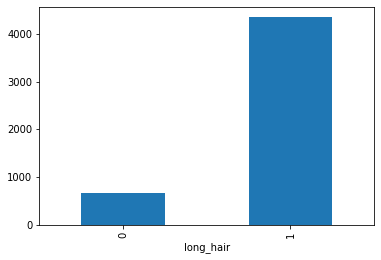

In [8]:
gender_hair.plot.bar();

Conforme verificamos no gráfico do histograma e de barra a relação da concentração de cabelo longo é muito maior que as pessoas com cabelo curto, neste caso vamos treinar o algoritmo sem a normalização e verificar suas metricas, caso seja ruim faremos a normalização. Agora faremos uma transformação da coluna gênero.

In [9]:
df['gender'] = df['gender'].replace({'Male':1, 'Female':0})
np.unique(df['gender'], return_counts=True)

(array([0, 1]), array([2501, 2500]))

In [10]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


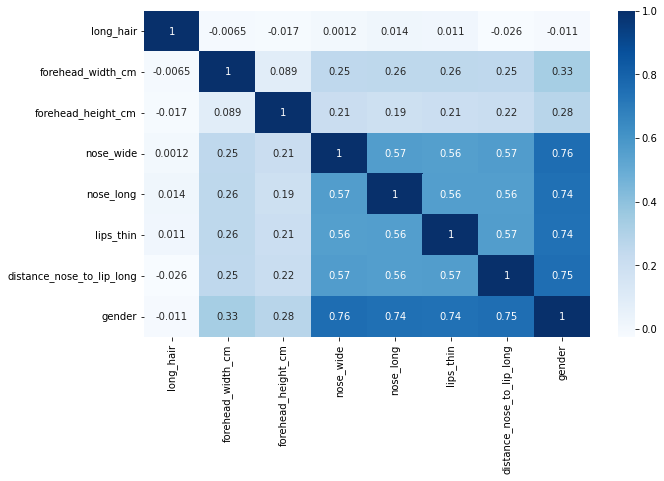

In [11]:
figure = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True);

O gráfico mostra a pouca correlação entre as colunas

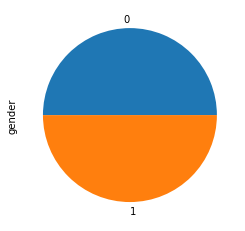

In [12]:
genero = df.groupby(['gender'])['gender'].count()
genero.plot.pie();

Há uma boa distribuição entre os gêneros

In [13]:
df['long_hair'].unique(), df['nose_wide'].unique(), df['nose_long'].unique(), df['lips_thin'].unique(), df['distance_nose_to_lip_long'].unique()

(array([1, 0]), array([1, 0]), array([0, 1]), array([1, 0]), array([1, 0]))

Não verificaremos os outliers das colunas acima pois seus valores unicos são valores binários. não havendo outros valores

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


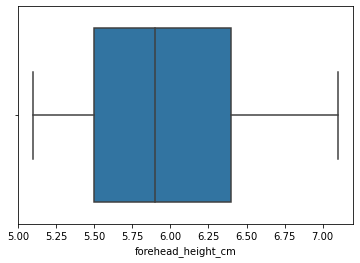

In [14]:
sns.boxplot(df['forehead_height_cm']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


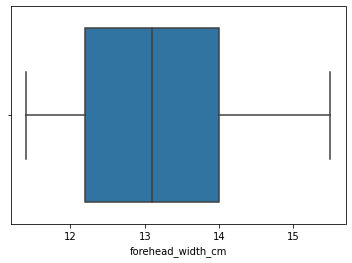

In [15]:
sns.boxplot(df['forehead_width_cm'])

Não temos outliers nas colunas solicitadas acima, somente a coluna de cabelo longo(long_hair) deve apresentar valores outliers por causa da sua alta concentração de cabelos longos.

# Treinando o modelo

In [16]:
x = df.iloc[:, :7]
y = df.iloc[:, -1]
x.shape, y.shape

((5001, 7), (5001,))

In [19]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 7), (1001, 7), (4000,), (1001,))

In [21]:
LR = linear_model.LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [22]:
pred_LR = LR.predict(x_test)
print(f'Previsão: {pred_LR[0:5]}')
print(f'Teste: \n{y_test[0:5]}')

Previsão: [0 1 0 1 0]
Teste: 
898     0
1912    1
377     0
2997    1
4117    0
Name: gender, dtype: int64


Como podemos verificar as primeiras predições estão estão de acordo com o teste

# Metricas de avaliação

In [24]:
metrics.jaccard_score(y_test, pred_LR, pos_label=0)

0.9361702127659575

No caso do Jaccard Score se o nosso conjunto de dados previsto corresponder totalmente ao conjunto de dados teste teremos o valor de 1.0, caso contrário teremos o 0.0. E neste caso como obtivemos o valor mais próximo de 1.0 significa que o modelo está com uma boa precisão.

In [25]:
metrics.accuracy_score(y_test, pred_LR)

0.967032967032967

O conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto de rótulos correspondente, neste caso a precisão está próxima de 1.0 mostrando que está boa.

In [26]:
CM = metrics.confusion_matrix(y_test, pred_LR)
CM

array([[484,  17],
       [ 16, 484]])

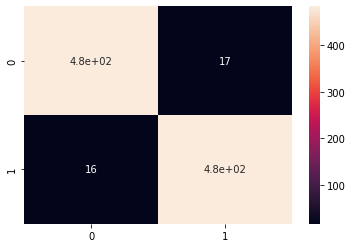

In [28]:
sns.heatmap(CM, annot=True);

In [29]:
484 / (484 + 17)

0.9660678642714571

O valor acima mostra  o percentual de acertos das pessoas do genero Feminino

In [30]:
484 / (484 + 16)

0.968

O valor acima mostra o percentual de acertos para as pessoas do sexo Masculino